<a href="https://colab.research.google.com/github/idhull1230/Stock-Market-Prediction/blob/main/Stock_Prediction_by_Idris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving AAPL.csv to AAPL.csv
Using file: AAPL.csv
Shape: (184, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


,Date,Open,High,Low,Close,Adj Close,Volume
count,184,184.000000,184.000000,184.000000,184.000000,184.000000,1.840000e+02
unique,184,NaN,NaN,NaN,NaN,NaN,NaN
top,2014-09-29,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,127.040245,129.918098,124.340381,127.352663,123.838032,1.910168e+08
std,NaN,24.314449,24.577906,24.176736,24.356534,25.655569,8.160281e+07
min,NaN,92.389999,93.769997,89.470001,90.519997,87.796822,3.839850e+07
25%,NaN,108.882499,112.362499,106.152502,109.204998,105.301765,1.273706e+08
50%,NaN,118.895000,120.865002,116.870003,119.190002,114.999730,1.744112e+08
75%,NaN,144.935005,147.695000,143.227493,144.704994,143.039467,2.207755e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       184 non-null    object 
 1   Open       184 non-null    float64
 2   High       184 non-null    float64
 3   Low        184 non-null    float64
 4   Close      184 non-null    float64
 5   Adj Close  184 non-null    float64
 6   Volume     184 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.2+ KB


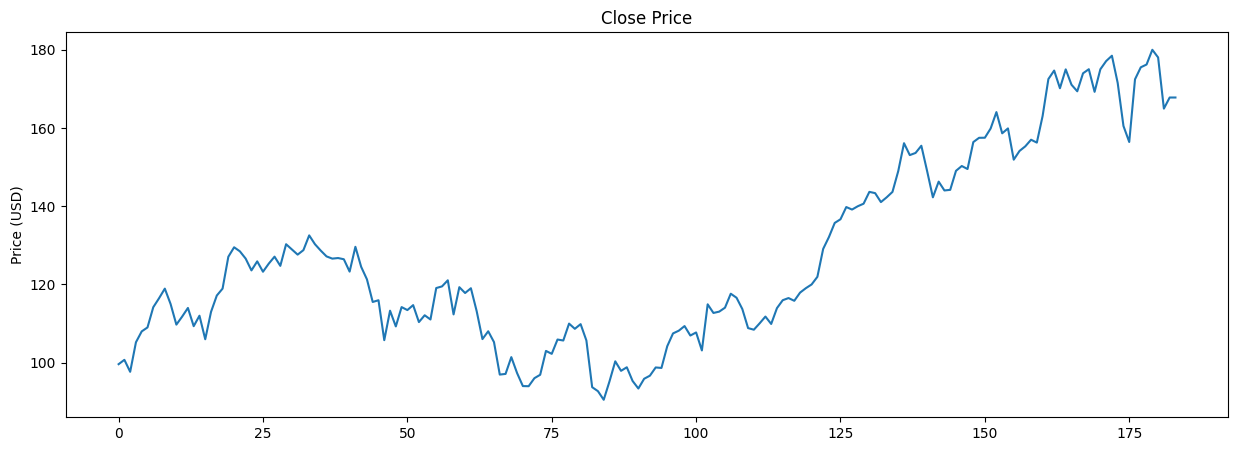


Missing values per column:
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


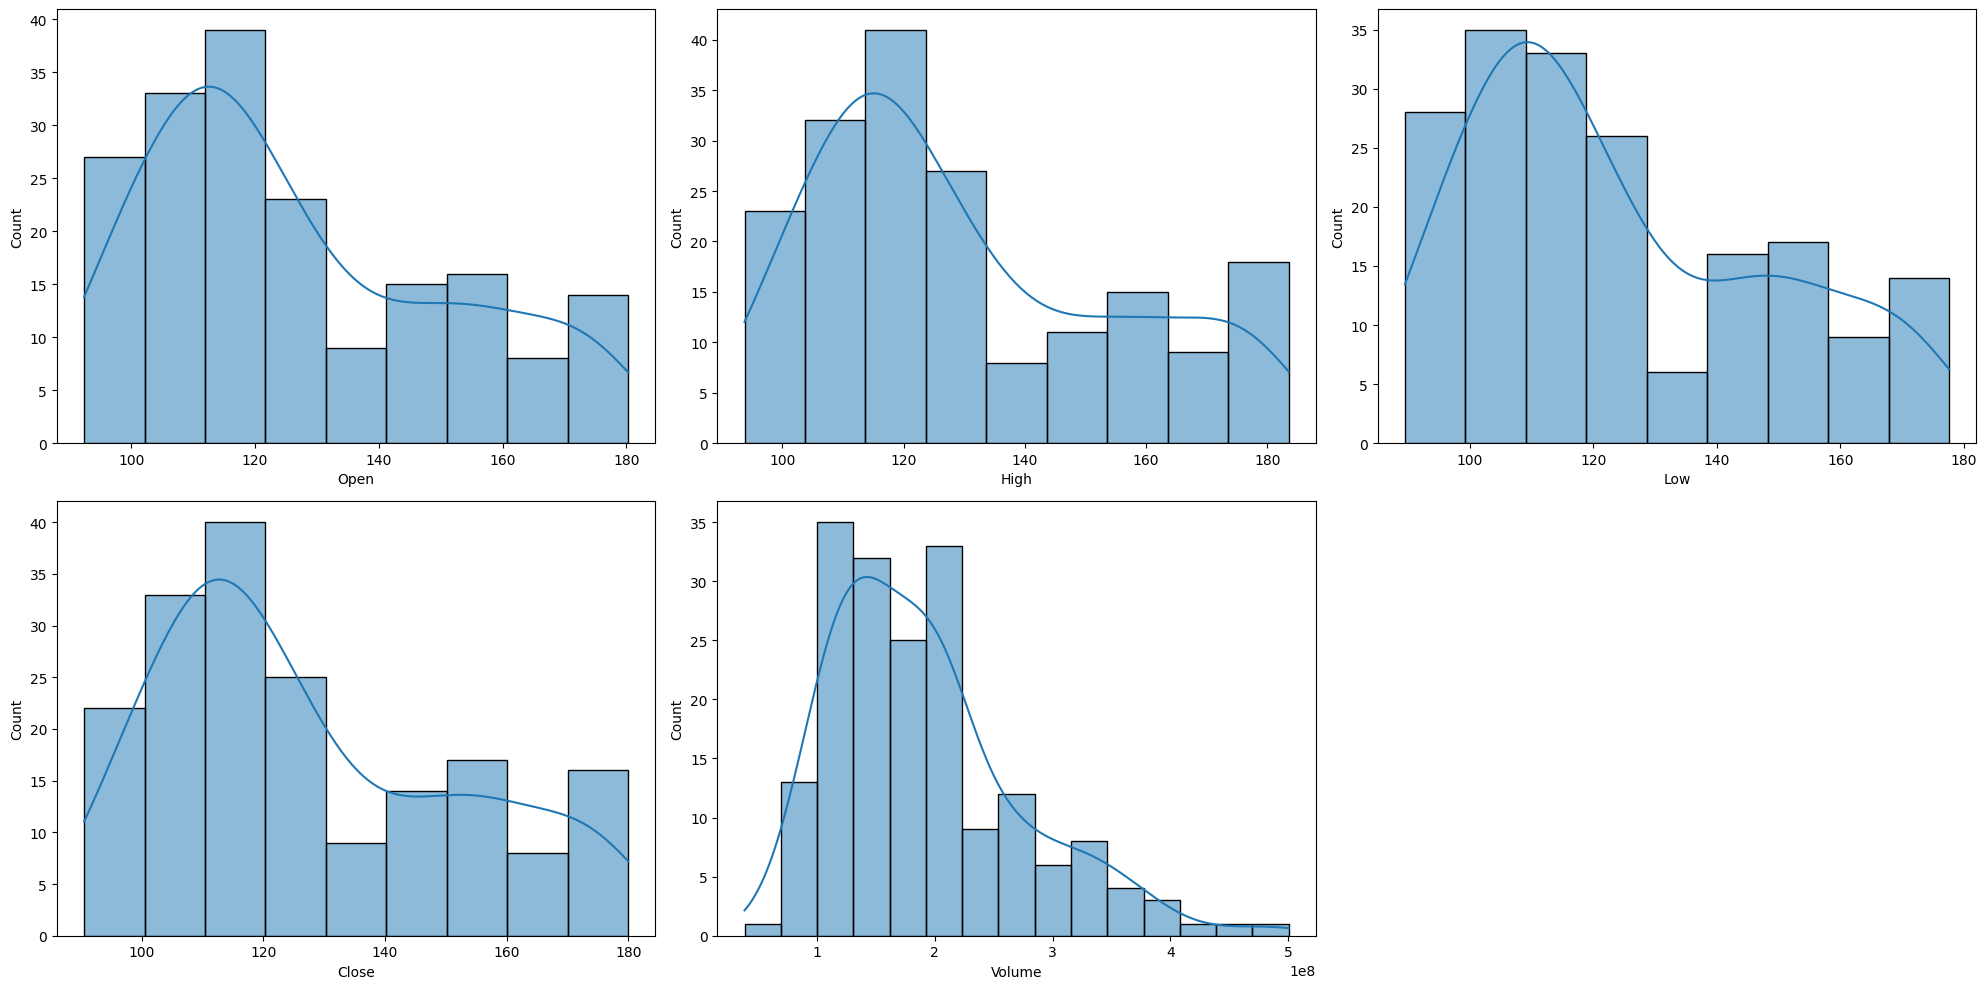

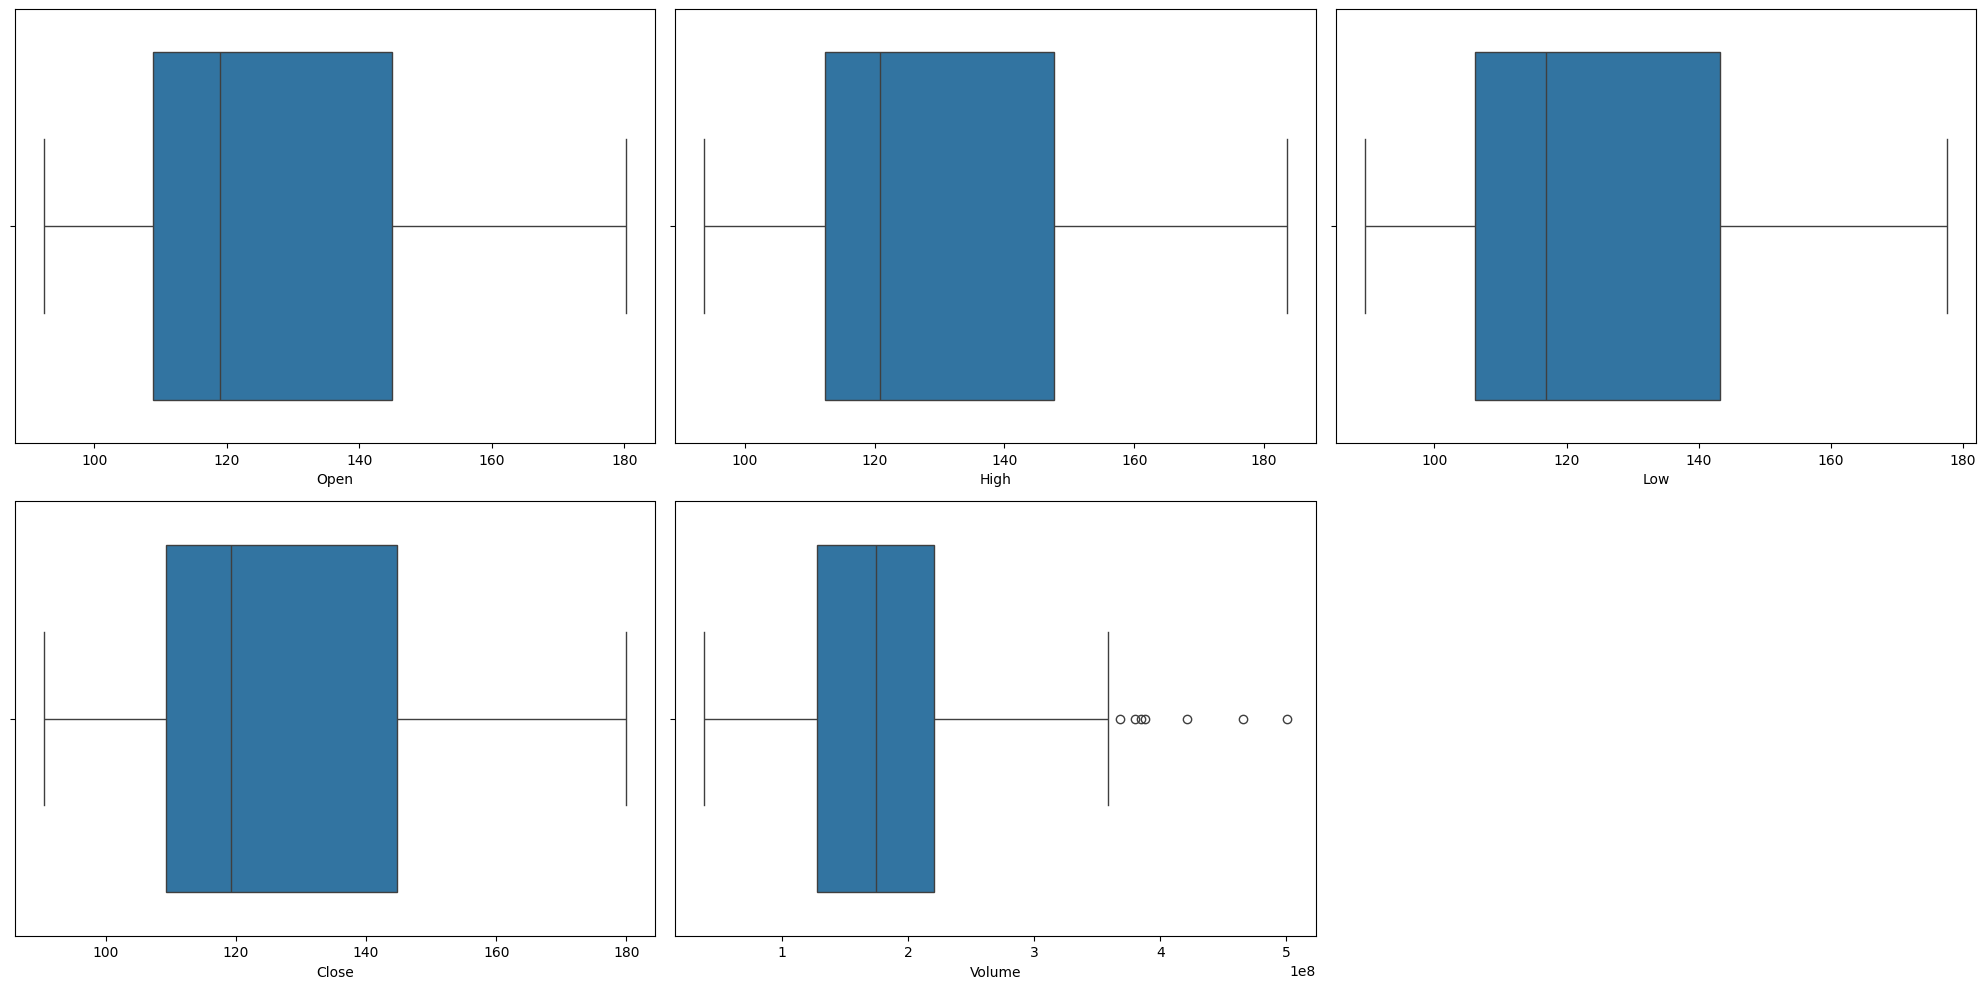

,Date,Open,High,Low,Close,Volume,month,day,year,is_quarter_end
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,142718700,9,29,2014,1
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,280258200,10,6,2014,0
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,358539800,10,13,2014,0
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,358532900,10,20,2014,0
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,220230600,10,27,2014,0


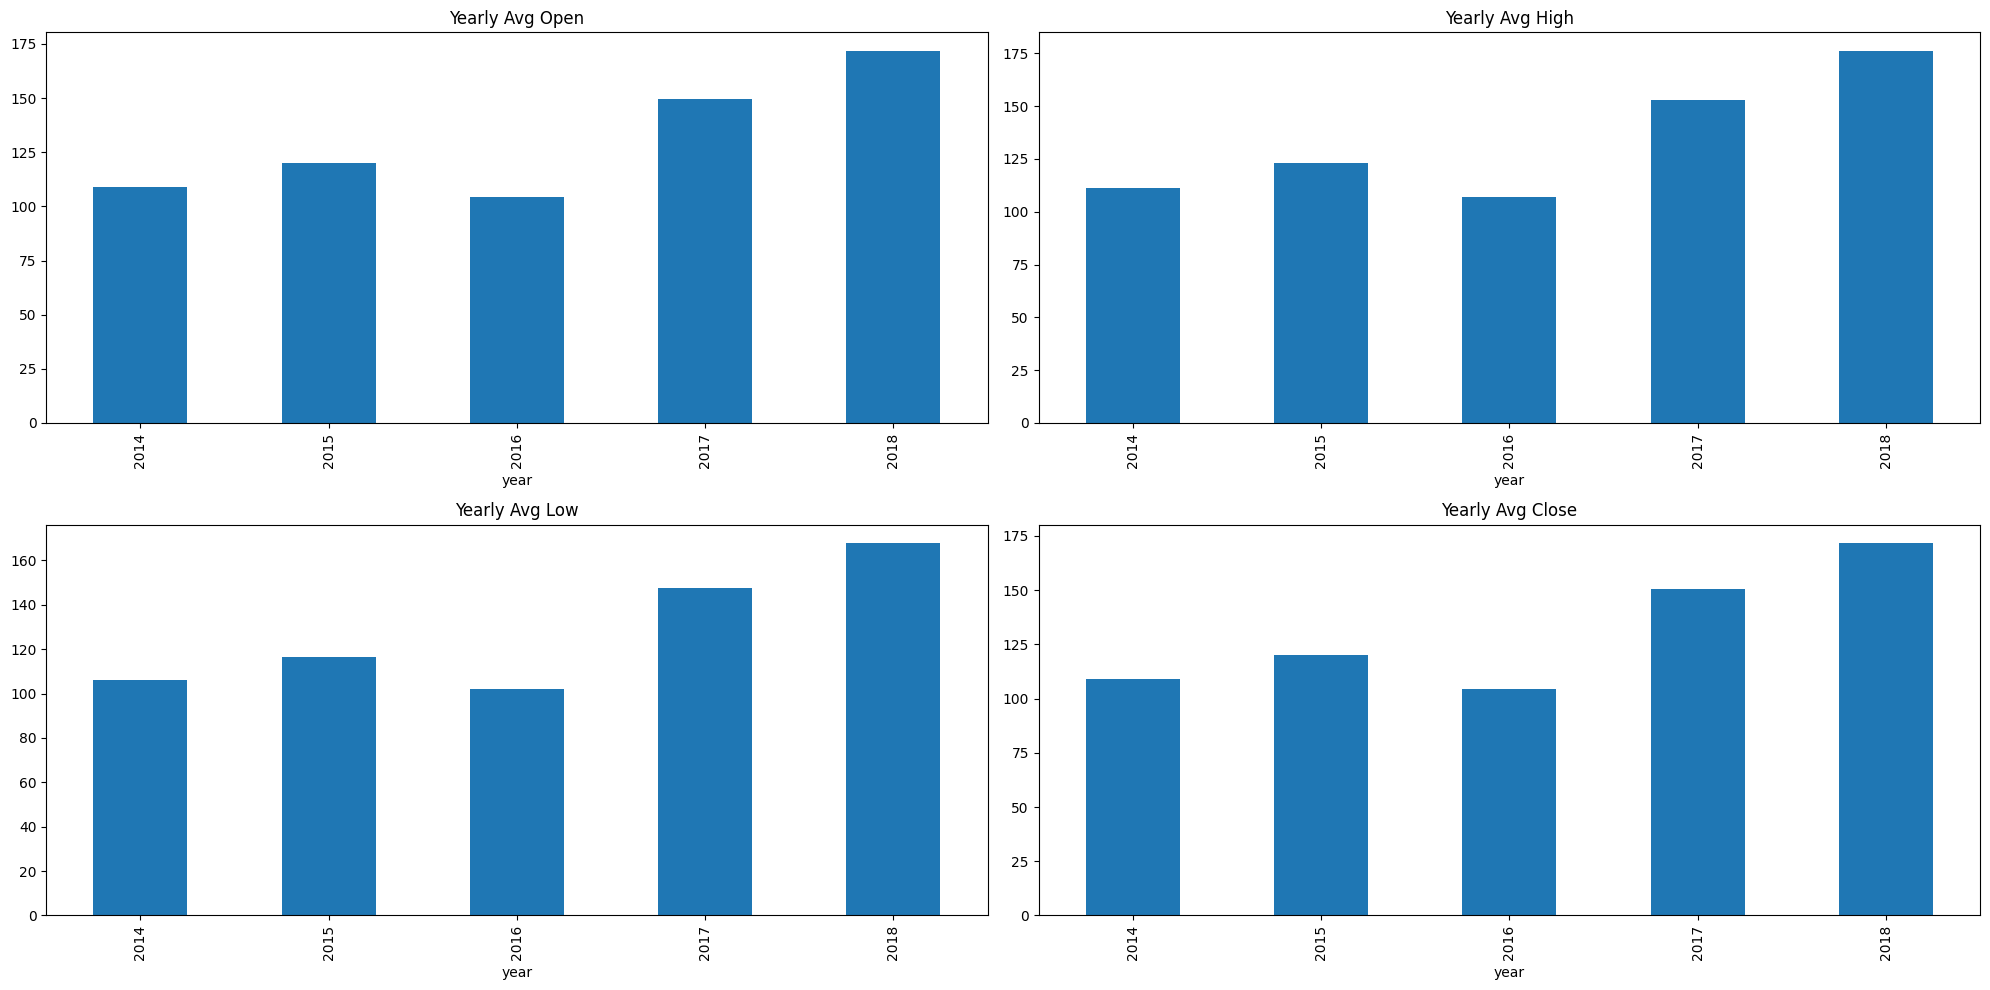

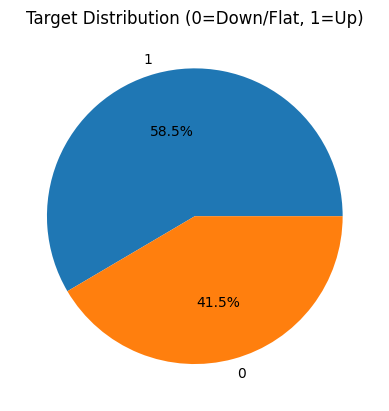

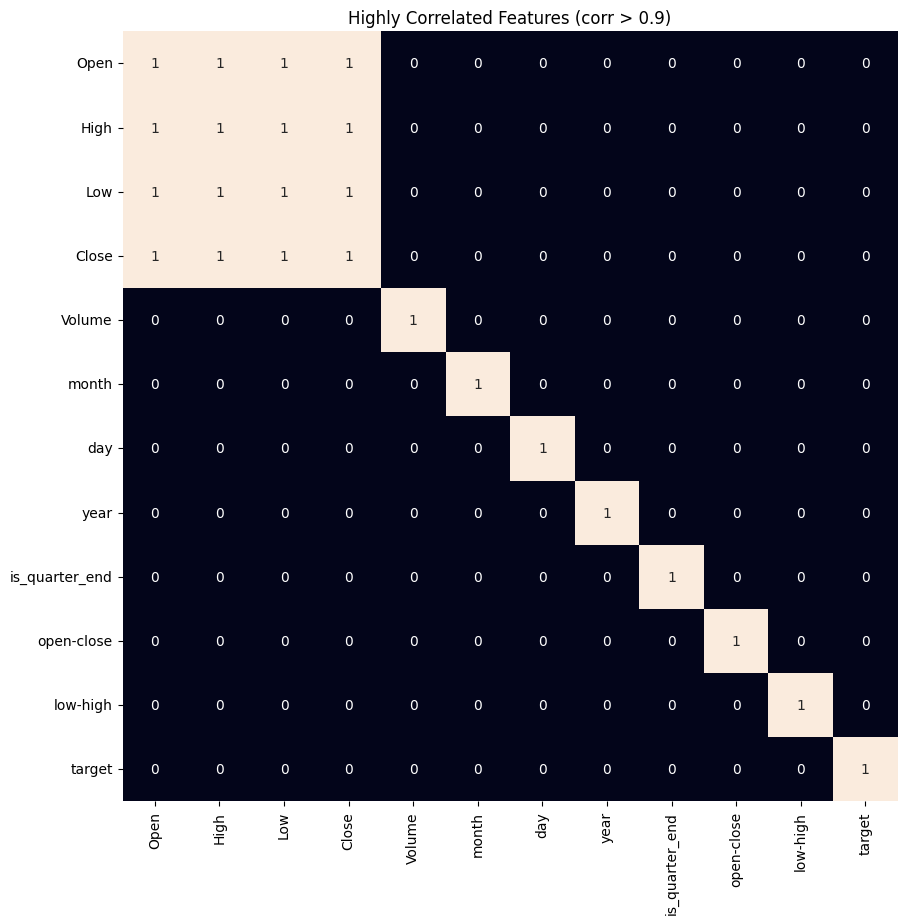

Train shape: (164, 3) Valid shape: (19, 3)

LogisticRegression
Training ROC-AUC: 0.5531556372549019
Validation ROC-AUC: 0.5

SVC
Training ROC-AUC: 0.36335784313725494
Validation ROC-AUC: 0.36363636363636365

XGBClassifier
Training ROC-AUC: 0.9999234068627452
Validation ROC-AUC: 0.7840909090909091


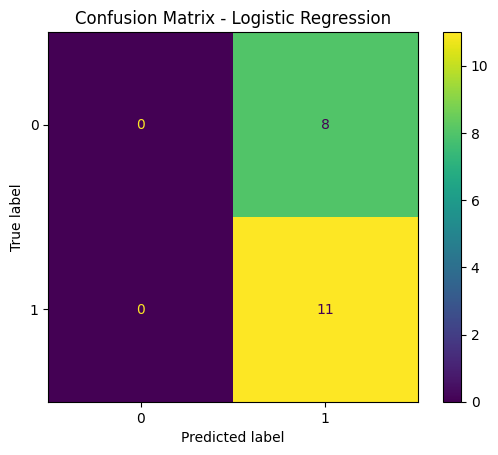

In [ ]:
!pip -q install xgboost

from google.colab import files
uploaded = files.upload()

csv_filename = list(uploaded.keys())[0]
print("Using file:", csv_filename)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(csv_filename)
print("Shape:", df.shape)
display(df.head())

display(df.describe(include="all"))
df.info()

plt.figure(figsize=(15, 5))
plt.plot(df["Close"])
plt.title("Close Price")
plt.ylabel("Price (USD)")
plt.show()

df = df.drop(["Adj Close"], axis=1, errors="ignore")

print("\nMissing values per column:\n", df.isnull().sum())

features = ["Open", "High", "Low", "Close", "Volume"]

plt.figure(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sb.histplot(df[col], kde=True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sb.boxplot(x=df[col])
plt.tight_layout()
plt.show()

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.dropna(subset=["Date"]).copy()

df["month"] = df["Date"].dt.month.astype(int)
df["day"] = df["Date"].dt.day.astype(int)
df["year"] = df["Date"].dt.year.astype(int)

df["is_quarter_end"] = np.where(df["month"] % 3 == 0, 1, 0)

display(df.head())

data_grouped = df.drop("Date", axis=1).groupby("year").mean(numeric_only=True)

plt.figure(figsize=(20, 10))
for i, col in enumerate(["Open", "High", "Low", "Close"]):
    plt.subplot(2, 2, i + 1)
    data_grouped[col].plot.bar()
    plt.title(f"Yearly Avg {col}")
plt.tight_layout()
plt.show()

df["open-close"] = df["Open"] - df["Close"]
df["low-high"] = df["Low"] - df["High"]

df["target"] = np.where(df["Close"].shift(-1) > df["Close"], 1, 0)
df = df.iloc[:-1].copy()

plt.figure()
plt.pie(
    df["target"].value_counts().values,
    labels=df["target"].value_counts().index.tolist(),
    autopct="%1.1f%%"
)
plt.title("Target Distribution (0=Down/Flat, 1=Up)")
plt.show()

plt.figure(figsize=(10, 10))
sb.heatmap(df.drop("Date", axis=1).corr(numeric_only=True) > 0.9, annot=True, cbar=False)
plt.title("Highly Correlated Features (corr > 0.9)")
plt.show()

X = df[["open-close", "low-high", "is_quarter_end"]]
y = df["target"]

mask = X.notna().all(axis=1) & y.notna()
X = X.loc[mask]
y = y.loc[mask]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_scaled, y, test_size=0.1, random_state=2022, stratify=y
)

print("Train shape:", X_train.shape, "Valid shape:", X_valid.shape)

models = [
    LogisticRegression(),
    SVC(kernel="poly", probability=True),
    XGBClassifier(use_label_encoder=False, eval_metric="logloss")
]

for model in models:
    model.fit(X_train, y_train)

    train_auc = metrics.roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    valid_auc = metrics.roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1])

    print(f"\n{model.__class__.__name__}")
    print("Training ROC-AUC:", train_auc)
    print("Validation ROC-AUC:", valid_auc)

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, y_valid)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
